### Import Library

In [1]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import zipfile, os, glob
import PIL

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

### Connect to API's Kaggle for download dataset from link dataset directly

In [3]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download manjilkarki/deepfake-and-real-images

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
100% 1.68G/1.68G [00:29<00:00, 100MB/s] 
100% 1.68G/1.68G [00:29<00:00, 61.5MB/s]


### Extract zip file

In [4]:
local_zip = 'deepfake-and-real-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

### Read base directory

In [5]:
base_dir = 'Dataset'
os.listdir(base_dir)

['Test', 'Train', 'Validation']

### Show labels on train, test, and validation directory

In [1]:
path_file_train = './Dataset/Train/'
path_file_test = './Dataset/Test/'
path_file_val = './Dataset/Validation'
print(os.listdir(path_file_train))
print(os.listdir(path_file_test))
print(os.listdir(path_file_val))

# Show sum of each data
print(f"\nJumlah data train : {len(glob.glob(os.path.join(path_file_train, '**/*.jpg')))}")
print(f"Jumlah data test : {len(glob.glob(os.path.join(path_file_test, '**/*.jpg')))}")
print(f"Jumlah data validation : {len(glob.glob(os.path.join(path_file_val, '**/*.jpg')))}")

NameError: name 'os' is not defined

### Declare batch size and image size

In [7]:
batch_size = 32
img_height = 180
img_width = 180

### Sum of train dataset used

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path_file_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 140002 files belonging to 2 classes.
Using 112002 files for training.


### Sum of validation dataset used

In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path_file_val,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39428 files belonging to 2 classes.
Using 7885 files for validation.


### Show class label of dataset

In [9]:
class_names = train_ds.class_names
print(class_names)

['Fake', 'Real']


### Show image in train dataset

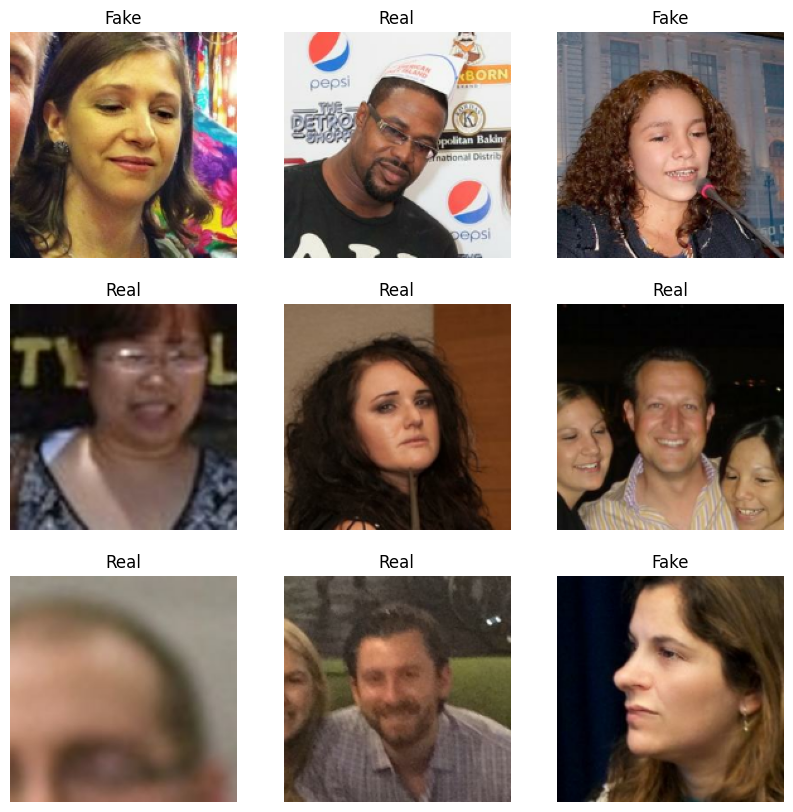

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Show batch and label size

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Normalize layer

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9981181


### Make a CNN Model

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Show summary of model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train model

In [19]:
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    steps_per_epoch=20,
    validation_steps=5,
    verbose=1
)

Epoch 1/100
20/20 [==============================] - 27s 1s/step - loss: 0.8195 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.4938
Epoch 2/100
20/20 [==============================] - 29s 1s/step - loss: 0.6908 - accuracy: 0.5766 - val_loss: 0.6886 - val_accuracy: 0.5125
Epoch 3/100
20/20 [==============================] - 26s 1s/step - loss: 0.6821 - accuracy: 0.5844 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 24s 1s/step - loss: 0.6445 - accuracy: 0.6250 - val_loss: 0.6206 - val_accuracy: 0.6062
Epoch 5/100
20/20 [==============================] - 26s 1s/step - loss: 0.6016 - accuracy: 0.7000 - val_loss: 0.5980 - val_accuracy: 0.6687
Epoch 6/100
20/20 [==============================] - 32s 2s/step - loss: 0.5907 - accuracy: 0.6734 - val_loss: 0.6540 - val_accuracy: 0.6187
Epoch 7/100
20/20 [==============================] - 24s 1s/step - loss: 0.5677 - accuracy: 0.7188 - val_loss: 0.6196 - val_accuracy: 0.6687
Epoch 8/100
2

### Visualize accuracy and loss with plot

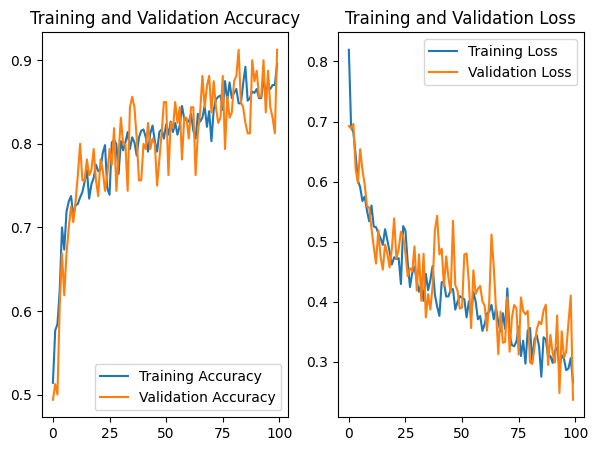

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Evaluate model

In [21]:
evaluation_result = model.evaluate(val_ds)
print(evaluation_result)

247/247 [==============================] - 91s 368ms/step - loss: 0.3889 - accuracy: 0.8374
[0.3889261782169342, 0.8374128341674805]


### Testing the model and show label prediction

1/1 [==============================] - 0s 134ms/step
[[ 4.945619 -2.677235]]


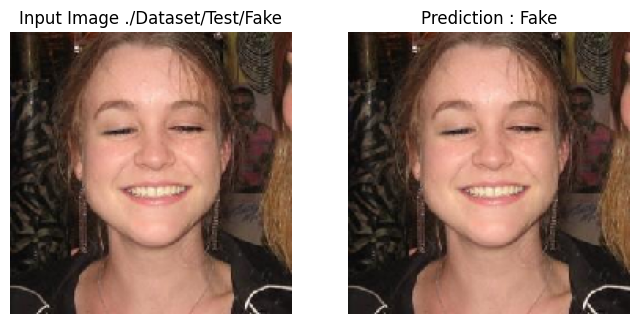

In [25]:
path_img = './Dataset/Test/Fake/fake_1056.jpg'

img = image.load_img(path_img, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

dir_name = os.path.dirname(path_img)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f'Input Image {dir_name}')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title("Prediction : " + list(train_ds.class_names)[np.argmax(classes)])
plt.axis("off")

plt.show()

### Save model

In [ ]:
# save model
model.save('original_face_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
